# WHAT IS BREAST CANCER?

         - Breast cancer is the most diagnosed cancer among women worldwide.
         - It is a type of cancer which forms in the cells of the breasts.

# WHAT IS THE CAUSE?

    - Getting older is the most significant risk for developing breast cancer. 
    - Most breast cancers (80%) occur in women over the age of 50. And the older you are, the higher your risk.

# SYMPTOMS:-

        - Thickening or swelling of part of the breast.
        - Irritation or dimpling of breast skin.

# TREATMENT:-
   
        - Surgery : An operation where doctors cut out cancer tissue.
        - Chemotherapy : Using special medicines to shrink or kill the cancer cells. The drugs can be pills you take or        medicines given in your veins, or sometimes both.
        - Hormonal therapy : Blocks cancer cells from getting the hormones they need to grow.
        - Biological therapy : Works with your body’s immune system to help it fight cancer cells or to control side effects    from other cancer treatments.
        - Radiation therapy : Using high-energy rays (similar to X-rays) to kill the cancer cells. 

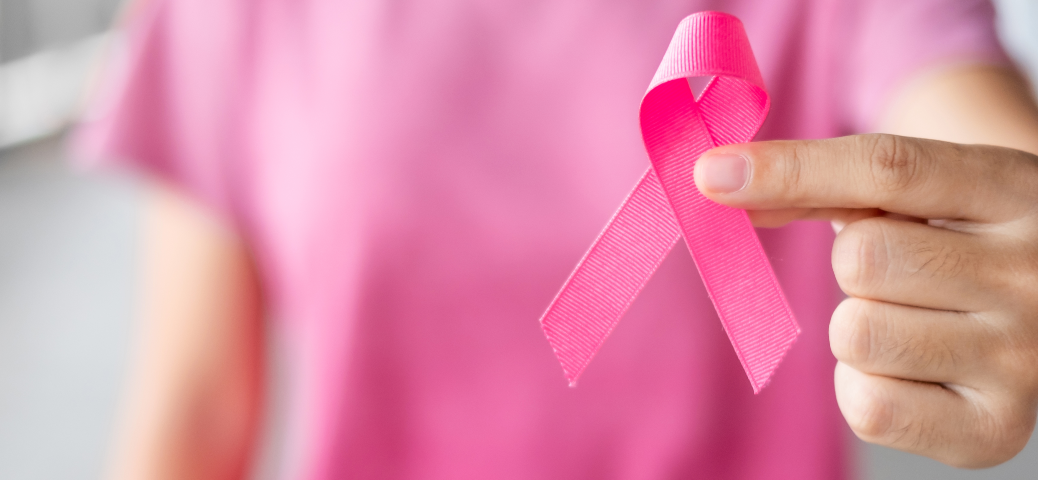

# Going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Coding
6. Experimentation / Improvements

# 1. Problem Definition

How we can use various python based Machine Learning Model and the given parameters to predict if the person has Breast   Cancer?

# 2. Data

Data from: http://localhost:8889/edit/dataR2.csv

DATA SET INFORMATION : 
    
    - There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.

    - The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.

    - Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.

# 3. Evaluation
As this is a classification problem, we will use the two algorithms that is, Random Forest Algorithm and Decision Tree Algorithm.

# 4. Features

Quantitative Attributes:

    1.Age (years)
    2.BMI (kg/m2)
    3.Glucose (mg/dL)
    4.Insulin (µU/mL) 
    5.HOMA
    6.Leptin (ng/mL)
    7.Adiponectin (µg/mL)
    8.Resistin (ng/mL)
    9.MCP-1(pg/dL)

OUTPUT/LABEL:
    
     10. Classification - 1 = Healthy controls / 2 = Patients

# 5. Coding

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns






In [10]:
import os
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

TO READ THE DATASET

In [11]:
#Now,the dataset will be read from the given data sheet named as dataR2,
#by using kaggle.

# using head command to get the top lists of data from datasheet
rs = pd.read_csv('dataR2.csv')
rs.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

In [12]:
# Using tail command to get the end of the data sheet

rs.tail()

Age    BMI  Glucose  Insulin      HOMA  Leptin  Adiponectin  Resistin  \
111   45  26.85       92     3.33  0.755688   54.68        12.10     10.96   
112   62  26.84      100     4.53  1.117400   12.45        21.42      7.32   
113   65  32.05       97     5.73  1.370998   61.48        22.54     10.33   
114   72  25.59       82     2.82  0.570392   24.96        33.75      3.27   
115   86  27.18      138    19.91  6.777364   90.28        14.11      4.35   

      MCP.1  Classification  
111  268.23               2  
112  330.16               2  
113  314.05               2  
114  392.46               2  
115   90.09               2

DATA EXPLORATION

In [13]:
# defining the data types

print(rs.dtypes)

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object


In [14]:
# describing data along with its parameters such as:

#      count,max and min values, mean and standard deviation, 25%,50%,75% value of entire data


rs.describe()

Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    3.210000    45.843000        1.000000  
25%       5.474283    6.881763   269.978250        1.000000  
50%       8.352692   10.827740   471.322500        2.000000  
75%      11.815970   17.755207   700.085000        2.000000  
max      38.040000   82.100000  1698.440000        2.000000

ANALYSIS OF MISSING DATA

 Ckech the miss data: 0      0
1      0
2      0
3      0
4      0
      ..
111    0
112    0
113    0
114    0
115    0
Length: 116, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


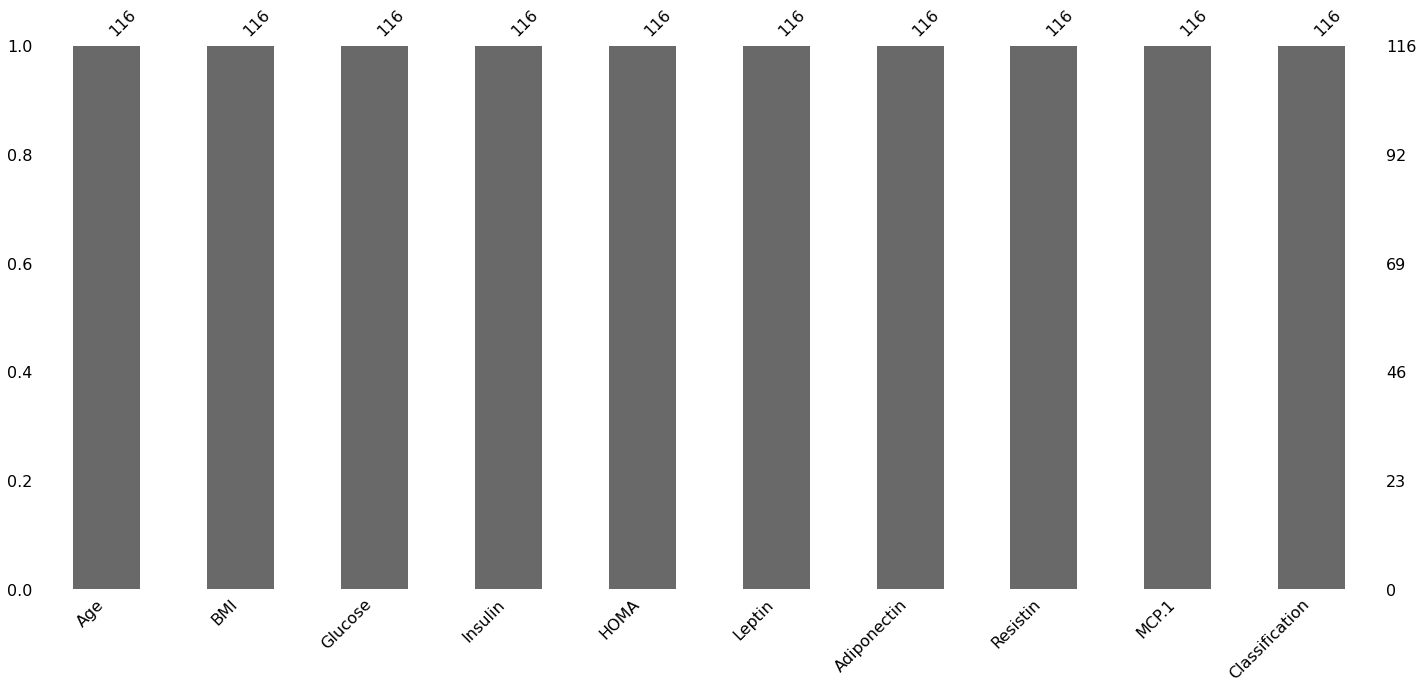

In [15]:
#To check whether any data is missing or not in the given huge dataset.
import missingno as no
print(f' Ckech the miss data:',rs.isna().sum(axis=1))
print(no.bar(rs))


CORRELATION OF DATA


In [16]:
#to correlate the data
#correlation indicates the changes between variables.
rs.corr()



Age       BMI   Glucose   Insulin      HOMA    Leptin  \
Age             1.000000  0.008530  0.230106  0.032495  0.127033  0.102626   
BMI             0.008530  1.000000  0.138845  0.145295  0.114480  0.569593   
Glucose         0.230106  0.138845  1.000000  0.504653  0.696212  0.305080   
Insulin         0.032495  0.145295  0.504653  1.000000  0.932198  0.301462   
HOMA            0.127033  0.114480  0.696212  0.932198  1.000000  0.327210   
Leptin          0.102626  0.569593  0.305080  0.301462  0.327210  1.000000   
Adiponectin    -0.219813 -0.302735 -0.122121 -0.031296 -0.056337 -0.095389   
Resistin        0.002742  0.195350  0.291327  0.146731  0.231101  0.256234   
MCP.1           0.013462  0.224038  0.264879  0.174356  0.259529  0.014009   
Classification -0.043555 -0.132586  0.384315  0.276804  0.284012 -0.001078   

                Adiponectin  Resistin     MCP.1  Classification  
Age               -0.219813  0.002742  0.013462       -0.043555  
BMI               -0.302735  0.195350  0.224038       -0.132586  
Glucose           -0.122121  0.291327  0.264879        0.384315  
Insulin           -0.031296  0.146731  0.174356        0.276804  
HOMA              -0.056337  0.231101  0.259529        0.284012  
Leptin            -0.095389  0.256234  0.014009       -0.001078  
Adiponectin        1.000000 -0.252363 -0.200694       -0.019490  
Resistin          -0.252363  1.000000  0.366474        0.227310  
MCP.1             -0.200694  0.366474  1.000000        0.091381  
Classification    -0.019490  0.227310  0.091381        1.000000

OVERVIEW OF DATA USING GRAPHS 

In [17]:
#It will give the overview of data with graphs and other corresponding factors.
#By using ProfileReport from pandas_profiling.
#Pandas-profiling generates profile reports from a pandas DataFrame .
import pandas as pd
from pandas_profiling import ProfileReport

profile = ProfileReport(rs,title="dataR2_report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'Heatmap'}>

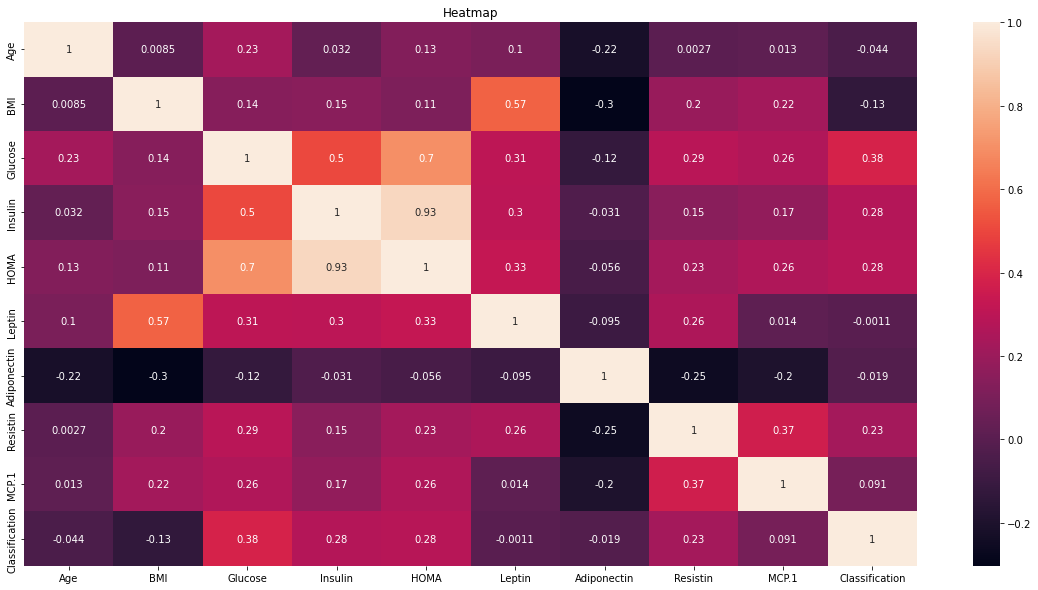

In [18]:
#Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix.
plt.figure(figsize=(20,10))
plt.title('Heatmap')
sns.heatmap(data=rs.corr(), annot=True)

<AxesSubplot:title={'center':'Age vs BMI color by Classification'}, xlabel='Age', ylabel='BMI'>

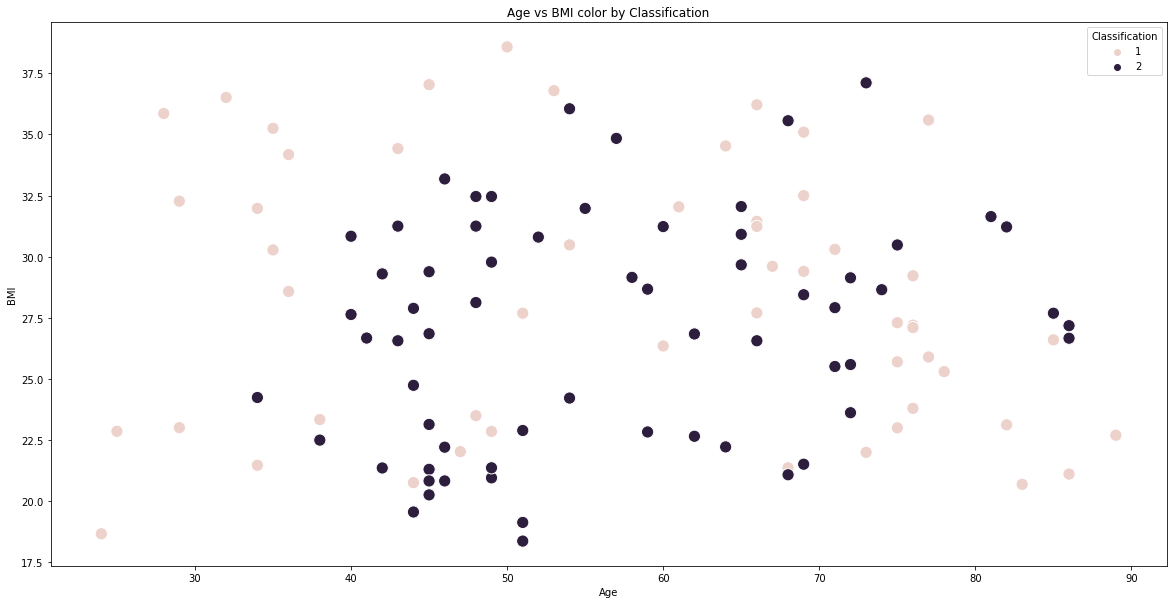

In [19]:
#A scatter plot is a diagram where each value in the data set is represented by a dot.
plt.figure(figsize=(20,10))
plt.title('Age vs BMI color by Classification')
sns.scatterplot(data=rs, x='Age',y='BMI', hue='Classification',s=150)

<AxesSubplot:title={'center':'Classification Count'}, xlabel='Classification', ylabel='count'>

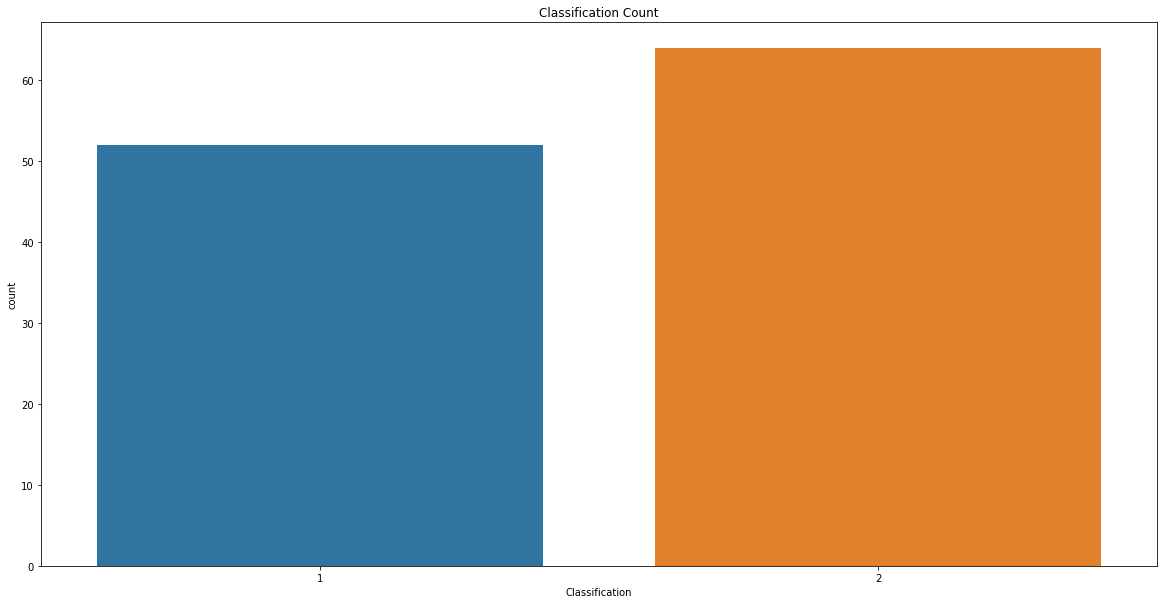

In [23]:
plt.figure(figsize=(20,10))
plt.title('Classification Count')  #classification refers to the stage of cancer.
#here,we are analysing the count vs classification,i.e.,how many will have stage 1 and stage 2 cancer.
sns.countplot(data=rs, x ='Classification')

<AxesSubplot:title={'center':'Histogram of Age'}, xlabel='Age', ylabel='Count'>

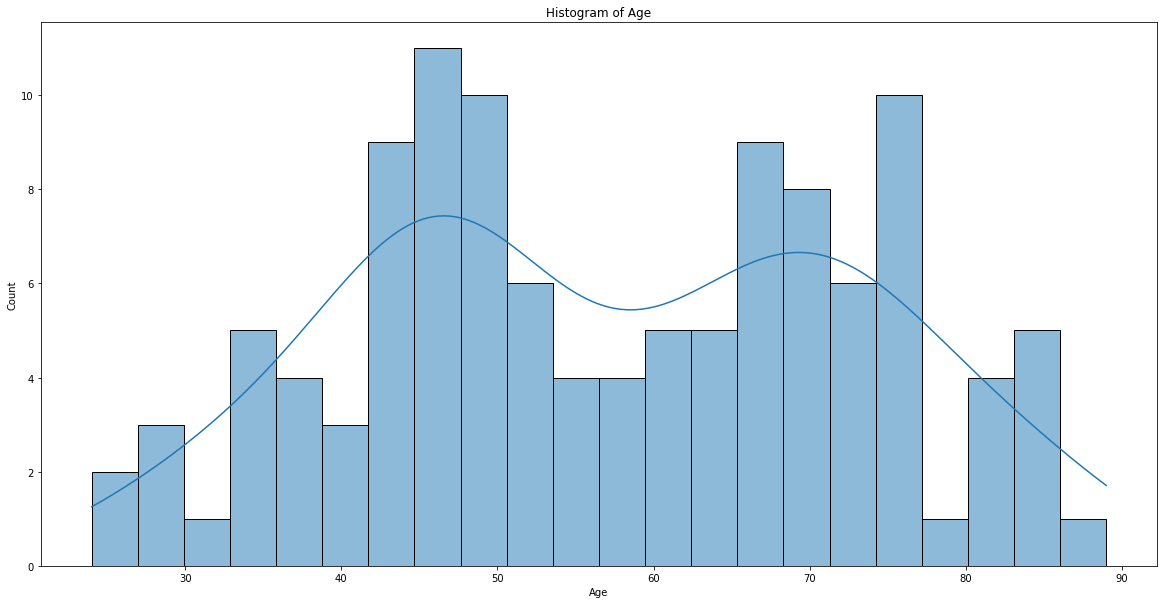

In [24]:
plt.figure(figsize=(20,10))
plt.title('Histogram of Age')#A histogram is a graph used to represent the frequency distribution of a few data points of one variable. 
sns.histplot(data=rs, x='Age', bins=22, kde=True) #Plotting the age vs count graph with the help of histogram.

<AxesSubplot:xlabel='Age'>

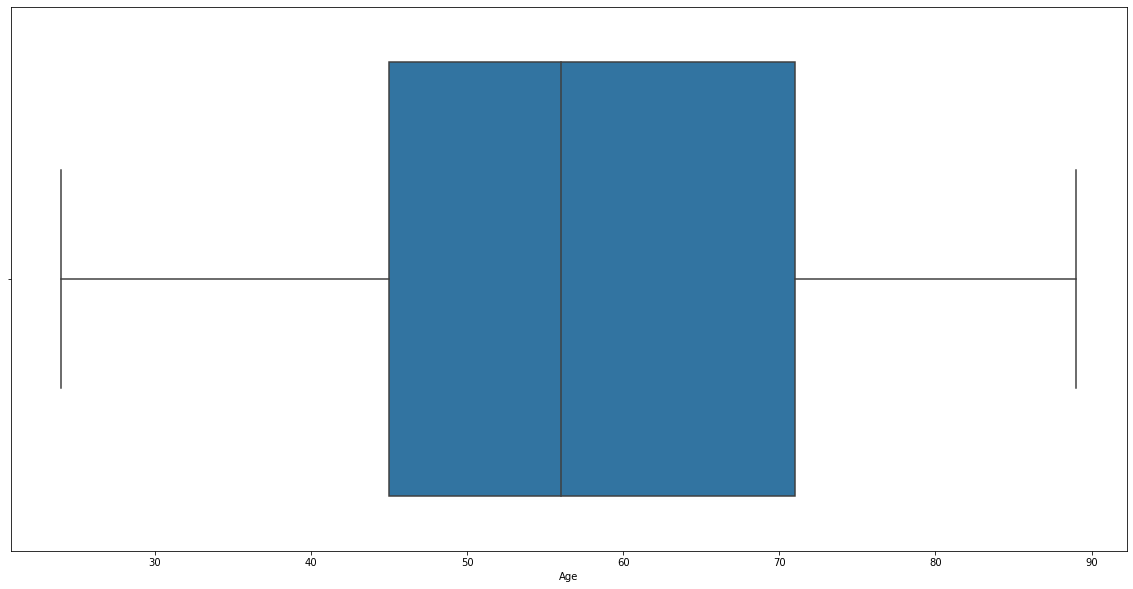

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data=rs, x='Age')#boxplot graph

IMPORTING MODELS

In [77]:
X = rs.drop('Classification', axis=1)
y = rs['Classification']

In [78]:
#Model_selection in sklearn is a method for setting a blueprint to analyze data and then using it to measure new data.
#The train_test_split() method is used to split our data into train and test sets.
from sklearn.model_selection import train_test_split
#Preprocessing is a technique that is used to convert the raw data into a clean data set.
#StandardScaler removes the mean and scales each feature/variable to unit variance.
#Here, Unit variance means dividing all the values by the standard deviation.
from sklearn.preprocessing import StandardScaler

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

IMPORTING OUR 2 ALGORITHMS,that is,
  1. DecisionTree Classifier
  2. RandomForest Classifier

In [81]:
#A decision tree is a very specific type of probability tree that enables you to make a decision about some kind of process.
from sklearn.tree import DecisionTreeClassifier
#The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set.
from sklearn.ensemble import RandomForestClassifier

In [82]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)  #The numpy random seed is a numerical value that generates a new set or repeats pseudo-random numbers. 
                        #The value in the numpy random seed saves the state of randomness.    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [83]:
models = {'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          }

In [84]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [85]:
baseline_model_scores

Score
DecisionTreeClassifier  0.750000
RandomForestClassifier  0.791667

# 6. Experimentation / Improvements

With a lower scoring model of 78% accuracy in the CV and for cancer classification, we hope to get a better scoring model.
Maybe we can look into the follow for improvements:

    1. Check for other outliers?
    2. Build and looking in to the data again to build a better model.
    3. Getting more data, as the current dataset is small.